# Pre-Processing

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Housing Prices Data from 1987-2022

In [154]:
hpi = pd.read_csv("Housing Price Index.csv")
hpi = hpi.rename({'CSUSHPISA': 'Housing Price Index'}, axis=1)
hpi.head()

,DATE,Housing Price Index
0,01-01-1987,63.965
1,01-02-1987,64.424
2,01-03-1987,64.736
3,01-04-1987,65.131
4,01-05-1987,65.563


Hourly Wages for Construction Employees from 1987-2022

In [155]:
ahe = pd.read_csv("Average Hourly Earning of Employees in the Construction Sector.csv")
ahe = ahe.rename({'CES2000000008': 'Average Hourly Earning of Employees in the Construction Sector'}, axis=1)
# changing the date format to match the one in the Housing Price Data
ahe['DATE'] = hpi['DATE'].values
ahe.head()

,DATE,Average Hourly Earning of Employees in the Construction Sector
0,01-01-1987,12.03
1,01-02-1987,11.99
2,01-03-1987,12.12
3,01-04-1987,12.10
4,01-05-1987,12.14


Annual Homeownership Rate from 1987-2022

In [156]:
hor = pd.read_csv("Homeownership Rate Annual.csv")
# we take the annual rate and use it for each month of that year
hor = hor.loc[hor.index.repeat(12)]
hor = hor.rename({'RHORUSQ156N': 'Average Annual Homeownership Rate'}, axis=1)
# changing the date format to match the one in the Housing Price Data
hor['DATE'] = hpi['DATE'].values
hor.head()

,DATE,Average Annual Homeownership Rate
0,01-01-1987,63.975
0,01-02-1987,63.975
0,01-03-1987,63.975
0,01-04-1987,63.975
0,01-05-1987,63.975


Unemployment Rate Data from 1987-2022

In [157]:
emp = pd.read_csv("Unemployment Rate.csv")
emp = emp.rename({'UNRATENSA': 'Unemployment Rate'}, axis=1)
# changing the date format to match the one in the Housing Price Data
emp['DATE'] = hpi['DATE'].values
emp.head()

,DATE,Unemployment Rate
0,01-01-1987,7.3
1,01-02-1987,7.2
2,01-03-1987,6.9
3,01-04-1987,6.2
4,01-05-1987,6.1


Annual Real GDP Data from 1987-2022

In [158]:
gdp = pd.read_csv("Real GDP Annual.csv")
#we take the annual GDP and use it for each month of that year
gdp = gdp.loc[gdp.index.repeat(12)]
gdp = gdp.rename({'GDPCA': 'Average Annual Real GDP'}, axis=1)
# changing the date format to match the one in the Housing Price Data
gdp['DATE'] = hpi['DATE'].values
gdp.head()

,DATE,Average Annual Real GDP
0,01-01-1987,8516.418
0,01-02-1987,8516.418
0,01-03-1987,8516.418
0,01-04-1987,8516.418
0,01-05-1987,8516.418


Mortgage Interest Rate (30-Year-Fixed) Data from 1987-2022

In [159]:
mgr = pd.read_csv("Mortgage Rate 30-Year-Fixed.csv")
mgr = mgr.rename({'MORTGAGE30US': 'Mortgage Interest Rate (30-Year-Fixed)'}, axis=1)
mgr.head()

,DATE,Mortgage Interest Rate (30-Year-Fixed)
0,01-01-1987,9.2040
1,01-02-1987,9.0825
2,01-03-1987,9.0350
3,01-04-1987,9.8325
4,01-05-1987,10.5960


Population Data from 1987-2022

In [160]:
pop = pd.read_csv("Population.csv")
pop = pop.rename({'POPTHM': 'Population'}, axis=1)
pop.head()

,DATE,Population
0,01-01-1987,241857
1,01-02-1987,242005
2,01-03-1987,242166
3,01-04-1987,242338
4,01-05-1987,242516


Household Estimates from 1987-2022

In [161]:
hhe = pd.read_csv("Household Estimates.csv")
hhe = hhe.rename({'TTLHHM156N': 'Household Estimates per Population'}, axis=1)
# we normalize the data by dividing by population levels and understanding households in proportion to overall population
hhe.iloc[:,1] = hhe.iloc[:,1]/pop.iloc[:,1]
hhe.head()

,DATE,Household Estimates per Population
0,01-01-1987,0.372108
1,01-02-1987,0.372401
2,01-03-1987,0.371489
3,01-04-1987,0.371630
4,01-05-1987,0.372474


Producer Price Index for Cement from 1987-2022

In [162]:
cem = pd.read_csv("Producer Price Index for Cement.csv")
cem = cem.rename({'PCU3273132731': 'Producer Price Index for Cement'}, axis=1)
# changing the date format to match the one in the Housing Price Data
cem['DATE'] = hpi['DATE'].values
cem.head()

,DATE,Producer Price Index for Cement
0,01-01-1987,100.1
1,01-02-1987,100.8
2,01-03-1987,101.2
3,01-04-1987,100.8
4,01-05-1987,101.2


Producer Price Index for Ready-Mix Concrete from 1987-2022

In [163]:
con = pd.read_csv("Producer Price Index for Ready-Mix Concrete.csv")
con = con.rename({'PCU327320327320': 'Producer Price Index for Ready-Mix Concrete'}, axis=1)
# changing the date format to match the one in the Housing Price Data
con['DATE'] = hpi['DATE'].values
con.head()

,DATE,Producer Price Index for Ready-Mix Concrete
0,01-01-1987,109.2
1,01-02-1987,109.2
2,01-03-1987,108.9
3,01-04-1987,109.1
4,01-05-1987,109.1


Producer Price Index for Paint and Coating from 1987-2022

In [164]:
pnt = pd.read_csv("Producer Price Index for Paint.csv")
pnt = pnt.rename({'PCU325510325510': 'Producer Price Index for Paint and Coating'}, axis=1)
# changing the date format to match the one in the Housing Price Data
pnt['DATE'] = hpi['DATE'].values
pnt.head()

,DATE,Producer Price Index for Paint and Coating
0,01-01-1987,106.3
1,01-02-1987,106.3
2,01-03-1987,106.5
3,01-04-1987,106.8
4,01-05-1987,106.9


In [165]:
#merging the datasets
df = pd.merge(hpi, ahe).merge(hor).merge(emp).merge(gdp).merge(mgr).merge(pop).merge(hhe).merge(cem).merge(con).merge(pnt)
df

,DATE,Housing Price Index,Average Hourly Earning of Employees in the Construction Sector,Average Annual Homeownership Rate,Unemployment Rate,Average Annual Real GDP,Mortgage Interest Rate (30-Year-Fixed),Population,Household Estimates per Population,Producer Price Index for Cement,Producer Price Index for Ready-Mix Concrete,Producer Price Index for Paint and Coating
0,01-01-1987,63.965,12.03,63.975,7.3,8516.418,9.2040,241857,0.372108,100.100,109.200,106.300
1,01-02-1987,64.424,11.99,63.975,7.2,8516.418,9.0825,242005,0.372401,100.800,109.200,106.300
2,01-03-1987,64.736,12.12,63.975,6.9,8516.418,9.0350,242166,0.371489,101.200,108.900,106.500
3,01-04-1987,65.131,12.10,63.975,6.2,8516.418,9.8325,242338,0.371630,100.800,109.100,106.800
4,01-05-1987,65.563,12.14,63.975,6.1,8516.418,10.5960,242516,0.372474,101.200,109.100,106.900
...,...,...,...,...,...,...,...,...,...,...,...,...
427,01-08-2022,301.704,32.55,65.775,3.8,20014.128,5.2225,333799,0.383815,299.589,339.575,413.813
428,01-09-2022,299.492,32.74,65.775,3.3,20014.128,6.1120,333976,0.385258,301.543,342.615,416.938
429,01-10-2022,298.975,32.88,65.775,3.4,20014.128,6.9000,334141,0.386771,306.079,344.206,420.164
430,01-11-2022,298.123,33.00,65.775,3.4,20014.128,6.8050,334287,0.386916,307.262,347.480,416.669


# Correlation Analysis


### Pearson Correlation Coefficient for Relationship with Home Prices

In [166]:
for column in df.iloc[:,2:]:
  r = np.corrcoef(df.iloc[:,1], df[column])
  coef = r[0,1]
  print(column + ": " + str(coef))

Average Hourly Earning of Employees in the Construction Sector: 0.9418364430365633
Average Annual Homeownership Rate: 0.2093089538347011
Unemployment Rate: -0.17296824573980202
Average Annual Real GDP: 0.9386544280190955
Mortgage Interest Rate (30-Year-Fixed): -0.7810779527496206
Population: 0.9028006399606876
Household Estimates per Population: -0.1092936731513103
Producer Price Index for Cement: 0.9596703563803337
Producer Price Index for Ready-Mix Concrete: 0.9512689088214171
Producer Price Index for Paint and Coating: 0.9273503847890889


### Scatterplots

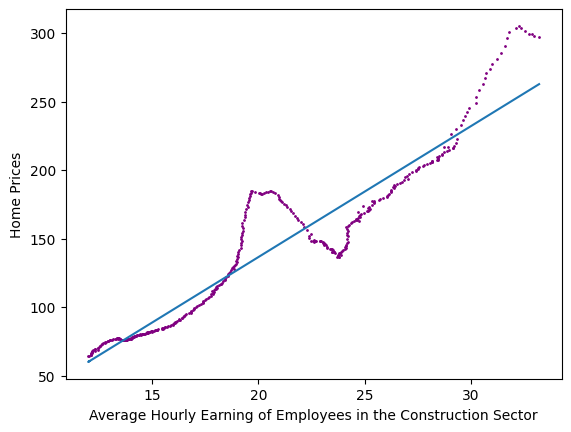

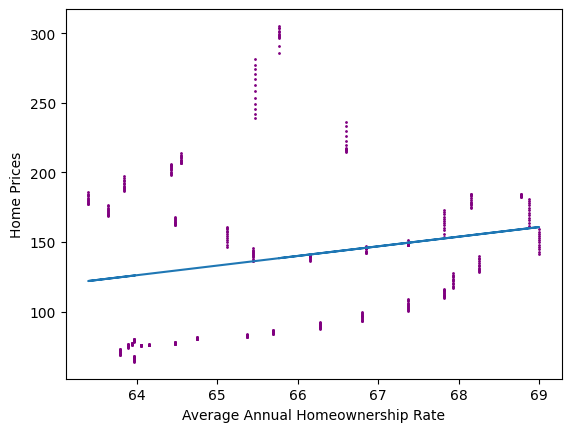

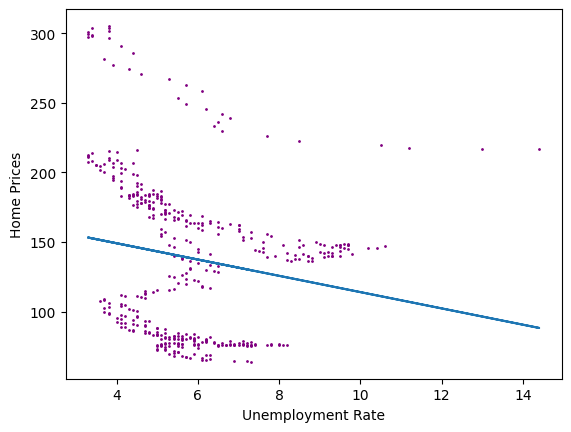

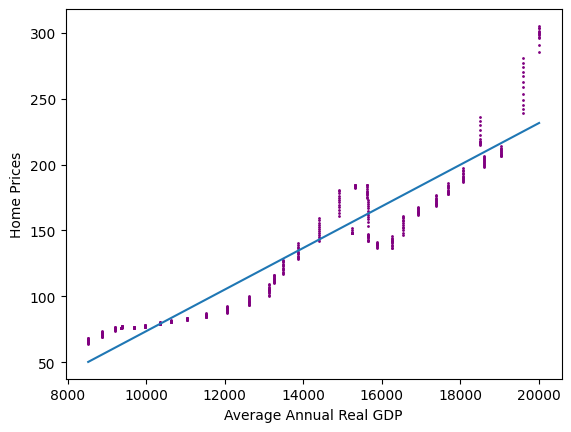

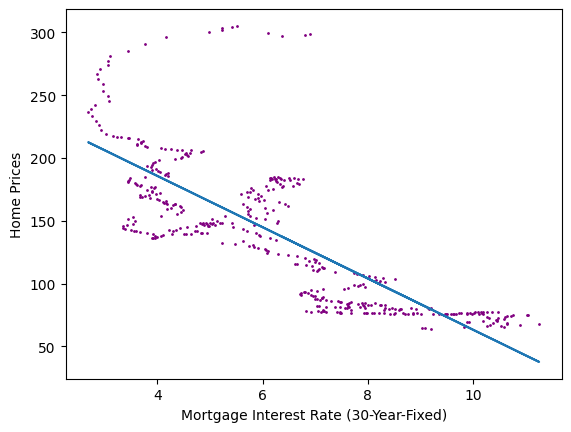

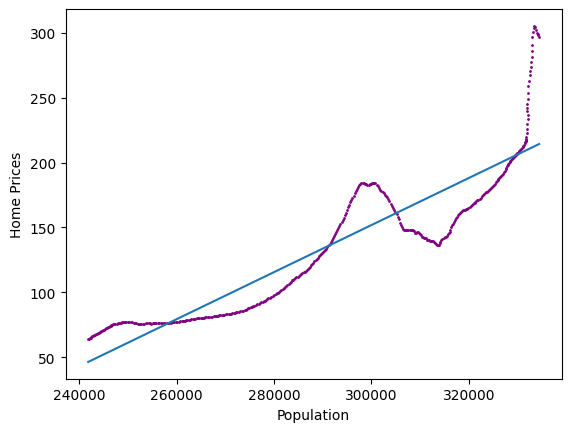

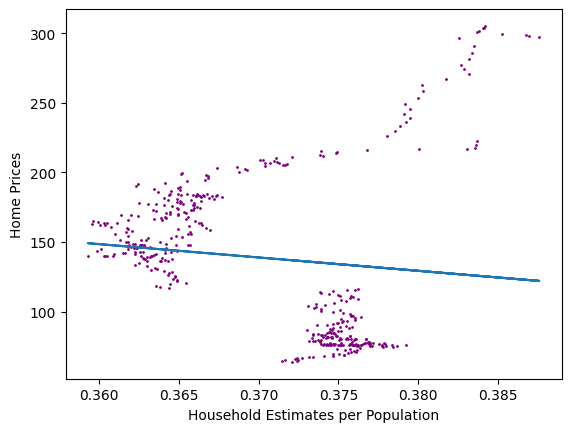

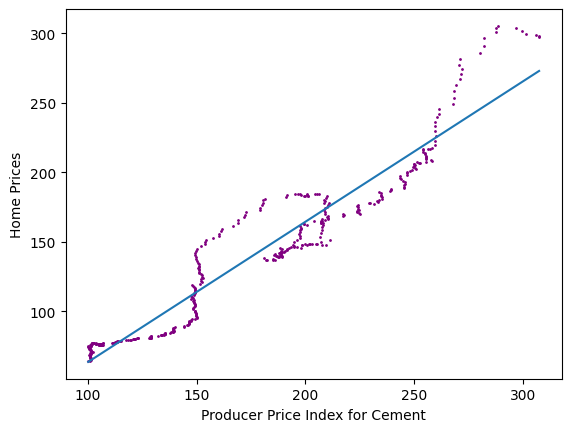

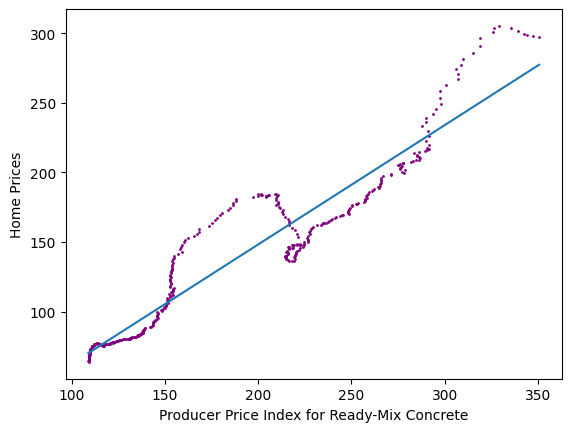

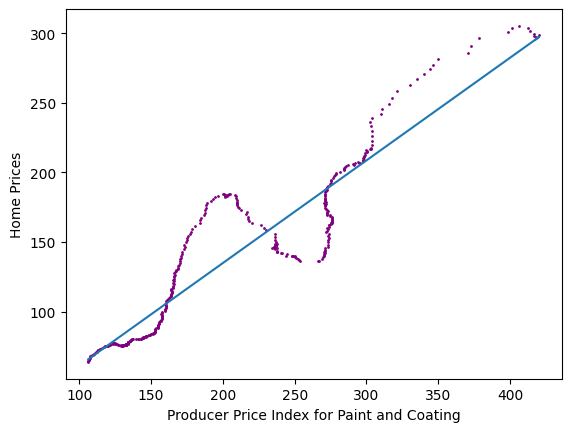

In [167]:
for column in df.iloc[:,2:]:
  a, b = np.polyfit(df[column], df.iloc[:,1], 1)
  plt.scatter(df[column],df.iloc[:,1],s=1,color='purple')
  plt.xlabel(column)
  plt.ylabel("Home Prices")
  plt.plot(df[column], a*df[column]+b)
  plt.show()

# Conclusion

From the results of the Pearson Correlation Test as well as the scatterplots, we can verify and understand better the following important relationships regarding supply-demand of homes and the factors affecting them:

  - Home prices have a very high positive correlation with Average Hourly Earning of Employees in the Construction Sector. This is because a rise in construction wages result in increasing costs of construction leading to a decline in supply of homes, which in turn increases the prices.
  - Home prices have a very high positive correlation with Annual Average Real GDP as it is an indicator of economic growth in the country and dictates the consumer confidence. A high GDP results in an increase in demand for housing, leading to a rise in prices.
  - Home prices have a high negative correlation with Mortgage Interest Rates, as they dictate the affordabilty of homes. High interest rates lead to a fall in demand for housing, causing a decline in home prices.
  - Home prices have a very high positive correlation with Population levels as a greater number of people would lead to a greater demand for housing and hence, a rise in prices.
  - Home prices have a very high positive correlation with the Producer Price Indices of Cement, Ready-Mix Concrete, Paint and Coating, etc. as these are essential construction materials and a rise in the prices of any of these can increase the cost of construction. This in turn would result in a fall in supply and therefore, a rise is home prices.